In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### <B> Load Dataset

In [20]:
df = pd.read_csv("BostonHouseprice.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### <b>Dataset Preprocessing 

In [21]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### <b> EDA-Correlation point

In [22]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'Median value price')

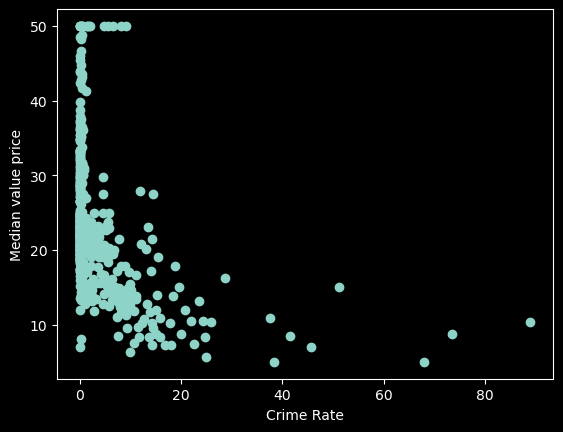

In [23]:
plt.scatter(df["CRIM"], df["MEDV"])
plt.xlabel("Crime Rate")
plt.ylabel("Median value price")

Text(0, 0.5, 'Median value price')

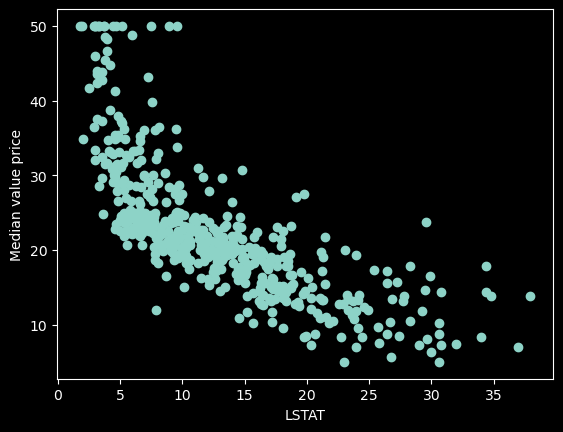

In [24]:
plt.scatter(df["LSTAT"], df["MEDV"])
plt.xlabel("LSTAT")
plt.ylabel("Median value price")

In [25]:
#separate dependent and independent variable 
X = df.drop(["MEDV"], axis="columns")
y = df["MEDV"]

In [26]:
#train test split
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=.3, random_state=5)
Xtr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
445,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666.0,20.2,43.06,23.98
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666.0,20.2,96.73,21.52
481,5.70818,0.0,18.10,0,0.532,6.750,74.9,3.3317,24,666.0,20.2,393.07,7.74
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226.0,17.9,395.93,4.81
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711.0,20.1,395.09,18.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666.0,20.2,392.68,14.98
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398.0,15.2,396.90,5.39
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391.0,19.2,393.29,17.60
206,0.22969,0.0,10.59,0,0.489,6.326,52.5,4.3549,4,277.0,18.6,394.87,10.97


In [27]:
#standarize dataset
Sc = StandardScaler()
Xtr = Sc.fit_transform(Xtr)
Xte = Sc.transform(Xte)

In [28]:
import pickle 
pickle.dump(Sc, open('scalling.pkl', 'wb'))

### <b> Model Training

In [29]:
regression = LinearRegression()
regression.fit(Xtr, ytr)

LinearRegression()

In [30]:
regression.predict(Xte)

array([37.38997666, 31.56794193, 27.13373886,  6.55117625, 33.69310848,
        5.54919368, 27.10005629, 29.82980986, 26.44622421, 22.38873525,
       32.24739998, 21.74892356, 23.42369575, 33.57974607, 28.31450393,
       15.36502049,  0.17012738, 18.7085528 , 14.6046344 , 10.80263809,
        3.18552876, 19.39248482, 38.33235502, 24.40456217, 31.99950162,
       11.35200963, 24.922899  , 23.39214933, 22.75072363, 21.09584945,
       16.12295584,  7.53544865, 17.59797845, 22.82206974, 29.26790527,
       18.8053497 , 28.33669828,  8.60467923, 41.63227506, 34.1975156 ,
       20.11767808,  4.30987094, 29.61105614, 11.92148423, 27.22215387,
       30.94537934, -6.26468581, 19.96366597, 21.59383857, 13.6435966 ,
       20.49852424, 19.9376828 , 23.65383649, 13.51654696, 17.64433366,
       25.20135154, 35.31489968, 15.25337249, 28.51004736, 21.85251949,
       20.66385004, 26.03157156, 14.71628387, 32.34648274, 20.7126339 ,
       12.16905109, 19.60990611, 25.19479418, 21.78988729, 21.17

In [31]:
regression.score(Xte, yte)

0.6771696999851693

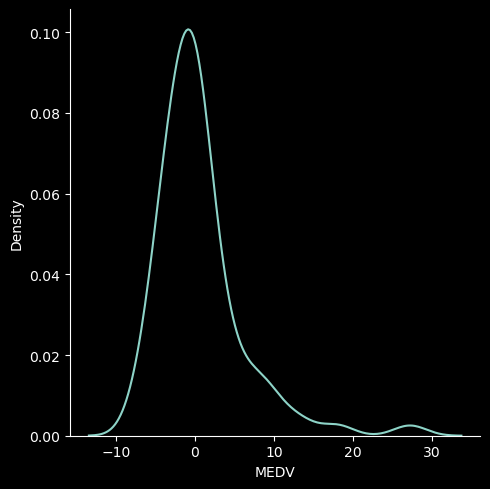

In [32]:
residual = yte-regression.predict(Xte)
sns.displot(residual, kind="kde")

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


print(mean_absolute_error(yte, regression.predict(Xte)))
print(mean_squared_error(yte, regression.predict(Xte)))
print(mean_absolute_error(yte, regression.predict(Xte)))

print(r2_score(yte, regression.predict(Xte)))

3.5576684756500416
30.697037704088576
3.5576684756500416
0.6771696999851693


In [34]:
import pickle 

pickle.dump(regression, open("regression_pickle", "wb"))
pickle_model = pickle.load(open("regression_pickle", "rb"))

pickle_model.predict([Xte[0]])

array([37.38997666])

00:55:41 <b> Last seen